<h1> Install Packages </h1>

In [1]:
!pip install tensorflow
!pip install numpy
!pip install -U imbalanced-learn
!pip install pandas
!pip install scikit-learn
!pip install imbalanced-learn
!pip install keras-tuner

<h1> Import Packages </h1>

In [2]:
import pandas as pd
import numpy as np
import imblearn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

2024-03-31 13:44:12.120869: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 13:44:13.531919: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<h1> Inspect Dataset (Before ROS) </h1>

In [3]:
final_df = pd.read_csv('../final_df.csv')

final_df.drop('Unnamed: 0', axis='columns', inplace=True)
final_df.head()

,Emotions_with_gender,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5,Emotions_without_gender
0,13,Ravdess\03-01-01-01-01-01-01.wav,-697.79260,54.890040,0.663466,12.435786,7.733952,0.530750,-3.216631,-3.159394,...,0.000005,0.000004,3.206722e-07,-0.049044,0.020024,-0.018065,-0.064224,0.014611,0.006371,5
1,5,Ravdess\03-01-01-01-01-01-02.wav,-650.71090,54.477303,-9.090127,8.411754,-4.387536,-3.765706,-5.362752,-8.610381,...,0.000006,0.000004,3.992178e-07,-0.019344,0.012139,0.013491,-0.040532,0.006054,0.002813,5
2,13,Ravdess\03-01-01-01-01-01-03.wav,-614.73914,56.708190,-2.685535,10.650176,4.240806,-2.472097,-12.035720,-6.654510,...,0.000071,0.000045,4.472179e-06,-0.013746,-0.006525,0.013147,-0.001333,0.005258,-0.001753,5
3,5,Ravdess\03-01-01-01-01-01-04.wav,-695.85030,42.934265,-7.274557,8.977729,-4.170579,-4.924890,-6.537960,-12.679187,...,0.000013,0.000006,6.443871e-07,-0.006601,0.012613,-0.023542,0.016175,-0.010311,0.000834,5
4,13,Ravdess\03-01-01-01-01-01-05.wav,-713.43350,68.360940,7.989171,15.139791,11.715775,0.430983,1.002558,-2.773119,...,0.000002,0.000001,7.229193e-08,-0.023409,0.016632,-0.042659,0.019653,0.014472,0.010889,5


# Shuffle Dataset

In [4]:
final_df = shuffle(final_df)
final_df

,Emotions_with_gender,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5,Emotions_without_gender
5568,10,Crema\1051_IWW_DIS_XX.wav,-387.66965,134.712830,-1.115913,52.368240,-23.403133,28.090439,-19.020924,18.724327,...,5.299762e-09,5.224723e-09,5.178522e-09,0.015031,0.001133,-0.046248,-0.027307,0.026311,-0.000317,2
9879,5,Tess\OAF_neutral\OAF_young_neutral.wav,-498.44418,75.669304,13.830461,9.597334,11.299131,4.011042,-4.383136,-8.218165,...,1.142066e-04,6.465117e-05,5.541804e-06,0.129801,0.109006,0.269180,-0.140066,0.099912,-0.015893,5
967,3,Ravdess\03-01-06-02-01-01-08.wav,-436.11075,21.274633,-19.265516,7.296686,-4.880798,-7.464470,0.243457,-10.680867,...,8.549578e-04,3.212246e-04,2.458066e-05,-0.057304,-0.006161,0.024880,-0.022482,0.020304,0.021785,3
9789,5,Tess\OAF_neutral\OAF_nag_neutral.wav,-498.40182,83.078384,17.286316,1.856552,16.474400,8.271911,-17.197615,-10.514358,...,3.661622e-05,2.295938e-05,2.190084e-06,0.048972,-0.067989,0.076883,-0.291725,0.065057,0.045961,5
3926,14,Crema\1031_IWL_SAD_XX.wav,-435.50037,148.619100,13.353285,58.346645,-19.122320,23.714400,-10.228700,11.432119,...,2.796423e-10,2.753000e-10,2.726523e-10,0.023736,-0.000601,-0.118631,-0.029688,0.011008,0.018054,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,11,Crema\1051_IEO_FEA_MD.wav,-443.72433,147.598770,8.473683,64.843185,-20.640318,32.593727,-17.665041,16.635382,...,1.540053e-09,1.518690e-09,1.505487e-09,-0.007387,-0.004775,-0.066218,-0.048589,0.008344,0.005260,3
9798,5,Tess\OAF_neutral\OAF_pain_neutral.wav,-526.16223,74.361220,18.887413,14.847102,17.171030,6.186592,-6.530912,-0.145216,...,3.352393e-05,2.024742e-05,1.620790e-06,0.002781,-0.176741,-0.008704,-0.282924,0.025146,0.101833,5
3939,8,Crema\1031_TAI_ANG_XX.wav,-384.96762,145.266250,3.022656,63.314743,-18.856676,5.728321,-13.726725,4.161640,...,9.439524e-09,9.330592e-09,9.262737e-09,-0.014884,-0.016777,-0.047630,-0.033812,0.007669,0.010107,0
1694,2,Crema\1004_IEO_DIS_HI.wav,-443.90543,134.418520,-1.092634,37.367350,-8.729391,26.111263,-13.571043,10.102278,...,5.683805e-12,5.471998e-12,5.345806e-12,0.005141,0.007563,-0.026200,-0.042070,0.013807,-0.002295,2


<h1> Sanitise Dataset (Target = Emotions with Gender) </h1>

In [5]:
final_df_testing = final_df.copy()

X = final_df_testing.drop(columns=['Path', 'Emotions_without_gender','Emotions_with_gender'], axis=1)
y = final_df_testing['Emotions_with_gender']
print(X.shape, y.shape)

(11682, 173) (11682,)


<h1> ROS </h1>

In [6]:
ros = RandomOverSampler(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_ros_train, y_ros_train = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('\n')
print('Resample dataset shape', Counter(y_ros_train))

Original dataset shape Counter({0: 905, 3: 883, 4: 879, 6: 876, 2: 859, 5: 766, 10: 631, 12: 622, 11: 612, 8: 607, 14: 585, 13: 491, 7: 392, 1: 83, 15: 78, 9: 76})


Resample dataset shape Counter({11: 905, 12: 905, 2: 905, 6: 905, 7: 905, 4: 905, 8: 905, 0: 905, 14: 905, 13: 905, 3: 905, 10: 905, 5: 905, 9: 905, 1: 905, 15: 905})


In [7]:
X_train

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
8362,-476.32425,131.680510,29.179120,52.246666,-9.772386,32.647705,-9.901540,11.749858,-7.045467,0.741633,...,3.106225e-09,3.046927e-09,3.008604e-09,2.984863e-09,0.007272,-0.022070,-0.033454,-0.008027,0.007578,0.005426
8405,-324.49152,95.077510,-13.736058,44.375760,-8.674505,18.507845,-10.372394,10.008927,-11.398891,-0.796458,...,2.364402e-10,2.306608e-10,2.267947e-10,2.243708e-10,-0.052449,-0.031448,-0.092647,0.002267,0.025801,-0.023048
5380,-369.09262,134.366130,4.492817,48.532173,-4.981409,11.528868,-14.826567,-0.957641,-15.978594,-1.546164,...,2.859460e-09,2.788864e-09,2.742680e-09,2.714406e-09,0.035698,0.004848,-0.019723,-0.005894,0.010100,0.003023
8614,-494.37726,140.862820,14.078427,64.563860,-10.993243,43.719883,-18.964846,16.246037,-11.357277,5.374682,...,1.342090e-09,1.319635e-09,1.305282e-09,1.296300e-09,-0.035726,0.008466,-0.053351,-0.020894,0.011862,0.007563
5660,-366.51715,128.229980,17.293610,43.079155,-10.516735,4.261290,-10.512840,3.086890,-11.751783,-3.277958,...,1.838293e-10,1.801900e-10,1.778921e-10,1.764625e-10,0.029351,-0.007231,-0.036002,-0.088428,0.032587,0.014636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-370.93408,111.817820,14.252699,49.113350,6.973542,12.273002,-12.016933,4.954798,-9.276437,2.820614,...,7.784980e-12,6.430087e-12,5.547625e-12,5.006277e-12,-0.018067,-0.002130,-0.082731,-0.003205,0.004688,-0.004282
7053,-383.77550,143.436050,19.115292,57.440690,-10.995274,12.008553,-13.850488,7.122675,-14.104164,-2.778110,...,1.738947e-09,1.719804e-09,1.708096e-09,1.700550e-09,0.035777,-0.005294,-0.068247,-0.013953,0.032532,0.014799
4841,-326.36615,125.655870,10.460626,46.804096,-5.366925,-2.552100,-15.249457,4.569418,-21.179520,5.034335,...,2.034878e-10,1.983184e-10,1.949152e-10,1.927544e-10,0.041041,-0.049470,-0.031282,0.012195,0.020499,-0.008000
10946,-287.26132,60.415800,-22.969288,4.901364,-11.104620,-4.107064,-11.968190,-22.181917,-2.695127,-0.994388,...,4.988364e-03,7.679218e-03,7.890468e-03,5.673805e-04,-0.029318,0.082098,0.099271,-0.020945,-0.003476,0.009337


<h1> Model Building and Model Tuning </h1>

In [8]:
model = tf.keras.Sequential()

model.add(layers.Conv1D(256, kernel_size=5, strides=1, 
                        padding="same", activation="relu",
                        input_shape=(X_ros_train.shape[1], 1))) 

model.add(layers.Conv1D(128, kernel_size=5, strides=1,  
                        padding="same", activation="relu")) 

model.add(layers.Conv1D(64, kernel_size=5, strides=1,  
                        padding="same", activation="relu")) 

model.add(layers.Conv1D(32, kernel_size=5, strides=1,  
                        padding="same", activation="relu")) 

model.add(layers.Flatten()) # flatten into a 1D array
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(32, activation='relu')) 

model.add(layers.Dense(len(np.unique(y_ros_train)), activation="softmax")) 
model.summary()


/common/home/projectgrps/IS424/IS424G4/jupyterlab-venv-py311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-03-31 13:44:16.453866: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 173, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 173, 128)       │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 173, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 173, 32)        │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,417,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,678,032 (6.40 MB)

 Trainable params: 1,678,032 (6.40 MB)

 Non-trainable params: 0 (0.00 B)

# Compile Model

In [9]:
learning_rate = 1e-4

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Model Fitting and Model Evaluation

In [10]:
# Regularisation - Define early stopping callback 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

epochs = 100

history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[early_stopping]) 
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 34s 134ms/step - accuracy: 0.1553 - loss: 2.5445 - val_accuracy: 0.2889 - val_loss: 2.0986
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - accuracy: 0.3620 - loss: 1.9387 - val_accuracy: 0.4339 - val_loss: 1.7355
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - accuracy: 0.4285 - loss: 1.6605 - val_accuracy: 0.4468 - val_loss: 1.6035
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.4780 - loss: 1.5479 - val_accuracy: 0.4831 - val_loss: 1.5405
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - accuracy: 0.4893 - loss: 1.4282 - val_accuracy: 0.4767 - val_loss: 1.4806
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 31s 134ms/step - accuracy: 0.5273 - loss: 1.3345 - val_accuracy: 0.4890 - val_loss: 1.4383
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 31s 134ms/step - accuracy: 0.5237 - loss: 1.3151 - val_accuracy: 0.5056 - val_loss: 1.3889
Epoch 8/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - accuracy: 0.5487 -

# Save Model

In [11]:
model_name = 'non_aug_CNN_tao.keras'

model.save(model_name)

# Test Saved Model

In [12]:
# Load the saved model
model_name = 'non_aug_CNN_tao.keras'
loaded_model = tf.keras.models.load_model(model_name)

# Evaluate the model on the test data
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5891 - loss: 1.1724
Test Loss: 1.255961298942566, Test Accuracy: 0.5729568004608154


<h1> Visualization of Training Loss/Accuracy Over Epochs </h1>

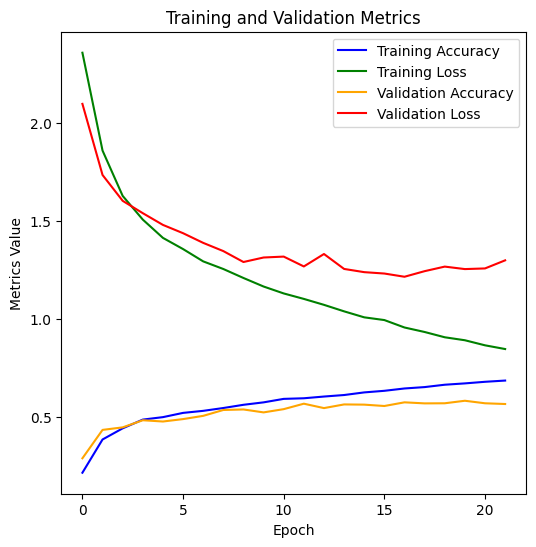

In [13]:
plt.figure(figsize=(6, 6))

# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')

# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss', color='green')

# Plot Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Plot Validation Loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')
plt.legend()

plt.grid(False)
plt.show()


<h1> Visualization for accuracy, precision, recall and F1-Score </h1>

74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step


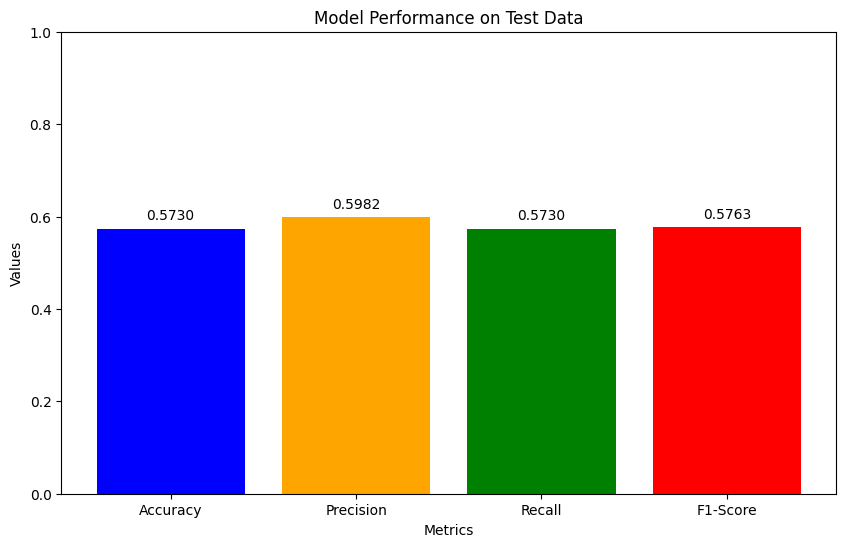

In [14]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')
f1 = f1_score(y_test, predicted_classes, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [test_accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance on Test Data')
plt.ylim(0, 1)  
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center')
plt.show()


<h1> Visualization of Confusion Matrix and Classification Report </h1>

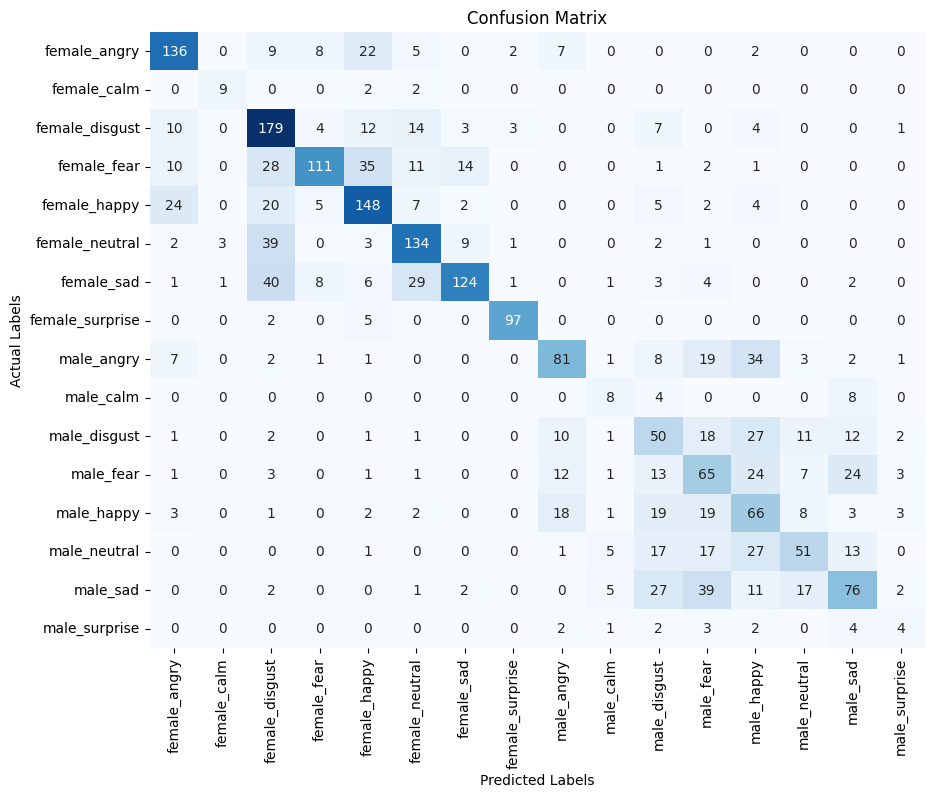

                 precision    recall  f1-score   support

   female_angry       0.70      0.71      0.70       191
    female_calm       0.69      0.69      0.69        13
 female_disgust       0.55      0.76      0.63       237
    female_fear       0.81      0.52      0.63       213
   female_happy       0.62      0.68      0.65       217
 female_neutral       0.65      0.69      0.67       194
     female_sad       0.81      0.56      0.66       220
female_surprise       0.93      0.93      0.93       104
     male_angry       0.62      0.51      0.56       160
      male_calm       0.33      0.40      0.36        20
   male_disgust       0.32      0.37      0.34       136
      male_fear       0.34      0.42      0.38       155
     male_happy       0.33      0.46      0.38       145
   male_neutral       0.53      0.39      0.45       132
       male_sad       0.53      0.42      0.47       182
  male_surprise       0.25      0.22      0.24        18

       accuracy              

In [15]:
label_map_with_gender = {
    0: 'female_angry',
    1: 'female_calm',
    2: 'female_disgust',
    3: 'female_fear',
    4: 'female_happy',
    5: 'female_neutral',
    6: 'female_sad',
    7: 'female_surprise',
    8: 'male_angry',
    9: 'male_calm',
    10: 'male_disgust',
    11: 'male_fear',
    12: 'male_happy',
    13: 'male_neutral',
    14: 'male_sad',
    15: 'male_surprise'
}

class_labels = [label_map_with_gender[i] for i in range(len(label_map_with_gender))]


cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=class_labels))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>